# World Happiness Data Analysis

## Project Overview
This project analyzes the **World Happiness dataset** to explore how different socio-economic factors influence happiness scores across countries and over time.

The notebook follows a clear analytical workflow:
- Data understanding and cleaning  
- Exploratory Data Analysis (EDA)  
- Visualization of key relationships  
- Correlation analysis  
- Linear Regressi
- KMeans Clustering

##  1. Import Libraries
We start by importing all required Python libraries for data manipulation, visualization, and machine learning.

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans

##  2. Load the Dataset
The dataset is loaded using Pandas.  
The separator and decimal format are specified to ensure correct parsing.

In [40]:
df = pd.read_csv("world_happiness.csv", sep=';', decimal=',')

##  3. Understanding the Dataset
Before performing any analysis, we explore the structure and basic characteristics of the dataset.


In [41]:
df.head()


,Ranking,Country,Regional indicator,Happiness score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Year
0,1,Switzerland,Western Europe,7.587,8.26132,0.96240,73,0.99379,0.37289,0.23941,2015
1,2,Iceland,Western Europe,7.561,7.70416,1.00000,73,0.93884,0.54819,0.74371,2015
2,3,Denmark,Western Europe,7.527,7.84114,0.97030,70,0.96962,0.42894,0.12382,2015
3,4,Norway,Western Europe,7.522,8.63100,0.94917,71,1.00000,0.43598,0.33860,2015
4,5,Canada,North America and ANZ,7.427,7.84595,0.94322,71,0.94511,0.57560,0.40285,2015


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1502 entries, 0 to 1501
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ranking                       1502 non-null   int64  
 1   Country                       1502 non-null   object 
 2   Regional indicator            1499 non-null   object 
 3   Happiness score               1502 non-null   float64
 4   GDP per capita                1502 non-null   float64
 5   Social support                1502 non-null   float64
 6   Healthy life expectancy       1502 non-null   int64  
 7   Freedom to make life choices  1502 non-null   float64
 8   Generosity                    1502 non-null   float64
 9   Perceptions of corruption     1502 non-null   float64
 10  Year                          1502 non-null   int64  
dtypes: float64(6), int64(3), object(2)
memory usage: 129.2+ KB


In [43]:
df.describe()

,Ranking,Happiness score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Year
count,1502.000000,1502.000000,1502.000000,1502.000000,1502.000000,1502.000000,1502.000000,1502.000000,1502.000000
mean,76.035286,5.448857,6.107178,0.691842,66.670439,0.658935,0.320369,0.452764,2019.374834
std,43.865013,1.125638,2.499571,0.212647,7.671376,0.216441,0.172669,0.321786,2.856316
min,1.000000,1.721000,0.000000,0.000000,39.000000,0.000000,0.000000,0.000000,2015.000000
25%,38.000000,4.593425,4.375967,0.564507,62.000000,0.535942,0.196085,0.158585,2017.000000
50%,76.000000,5.469650,6.305600,0.738190,68.000000,0.690305,0.296375,0.345325,2019.000000
75%,114.000000,6.278450,8.047867,0.861528,72.000000,0.831792,0.430042,0.782560,2022.000000
max,158.000000,7.842100,10.000000,1.000000,85.000000,1.000000,1.000000,1.000000,2024.000000


### Key Observations
- The dataset contains **1502 records** and **11 columns**
- Data spans multiple years (2015–2024)
- Most features are numerical and suitable for statistical analysis


##  4. Data Cleaning
To ensure high-quality analysis, we clean the dataset by:
- Standardizing column names
- Removing missing values
- Removing duplicate rows


Standardize column names:

In [44]:
df.columns = df.columns.str.lower().str.replace(" ", "_")

Remove missing values and duplicates:

In [45]:
df = df.dropna()
df = df.drop_duplicates()

## 5. Descriptive Statistics
This section provides an overview of global happiness levels.


Global average happiness score:

In [46]:
df["happiness_score"].mean()

5.449229086057372

Happiest country:


In [47]:
df.loc[df["happiness_score"].idxmax()]

ranking                                      1
country                                Finland
regional_indicator              Western Europe
happiness_score                         7.8421
gdp_per_capita                         8.26118
social_support                         0.94362
healthy_life_expectancy                     72
freedom_to_make_life_choices           0.96454
generosity                             0.22947
perceptions_of_corruption              0.12117
year                                      2021
Name: 972, dtype: object

Least happy country:

In [48]:
df.loc[df["happiness_score"].idxmin()]

ranking                                 140
country                         Afghanistan
regional_indicator               South Asia
happiness_score                       1.721
gdp_per_capita                      2.93451
social_support                          0.0
healthy_life_expectancy                  62
freedom_to_make_life_choices            0.0
generosity                          0.22638
perceptions_of_corruption           0.15383
year                                   2024
Name: 1362, dtype: object

There is a significant gap between the happiest and least happy countries, highlighting inequality in global well-being.


##  6. Happiness by Region 
We analyze how average happiness scores vary across different world regions.


In [49]:
region_happiness = (
    df.groupby("regional_indicator")["happiness_score"]
    .mean()
    .sort_values(ascending=False)
)

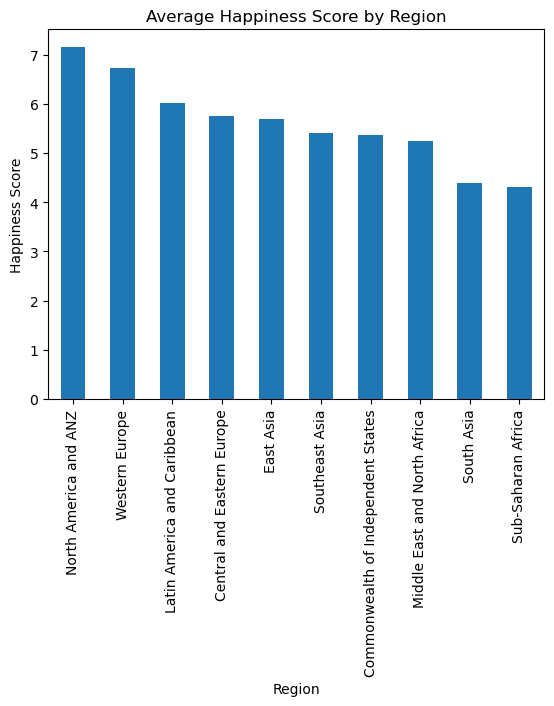

In [50]:
region_happiness.plot(kind="bar", title="Average Happiness Score by Region")
plt.xlabel("Region")
plt.ylabel("Happiness Score")
plt.show()

Western Europe and North America show consistently higher happiness levels compared to other regions.


## 7. Relationship Between Key Factors and Happiness
This section explores how specific factors relate to happiness scores.


GDP per Capita vs Happiness Score

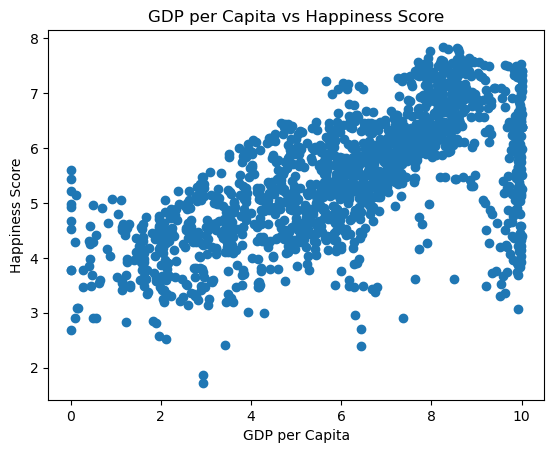

In [51]:
plt.scatter(df["gdp_per_capita"], df["happiness_score"])
plt.xlabel("GDP per Capita")
plt.ylabel("Happiness Score")
plt.title("GDP per Capita vs Happiness Score")
plt.show()

Social Support vs Happiness Score

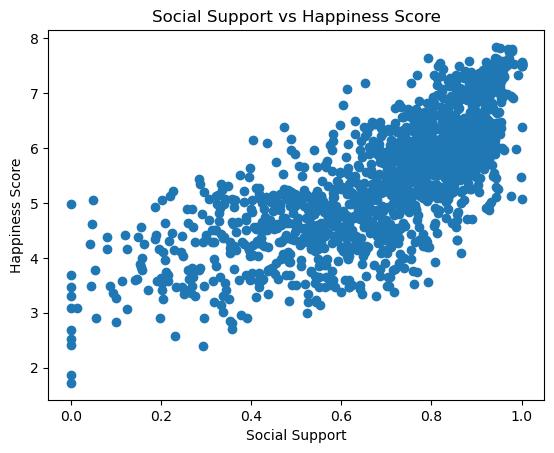

In [52]:
plt.scatter(df["social_support"], df["happiness_score"])
plt.xlabel("Social Support")
plt.ylabel("Happiness Score")
plt.title("Social Support vs Happiness Score")
plt.show()

##  8. Correlation Matrix
To better understand the relationships between all key variables, we compute a correlation matrix.


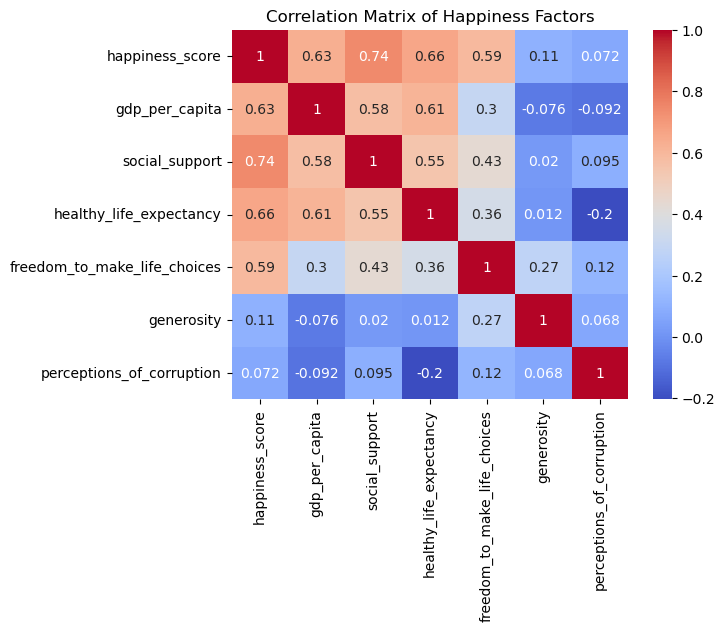

In [53]:
corr = df[
    [
        "happiness_score",
        "gdp_per_capita",
        "social_support",
        "healthy_life_expectancy",
        "freedom_to_make_life_choices",
        "generosity",
        "perceptions_of_corruption"
    ]
].corr()

sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix of Happiness Factors")
plt.show()

GDP per capita and social support have the strongest correlation with happiness scores.


##  9. Happiness Trend Over Time 
This section analyzes how global happiness has changed over the years.


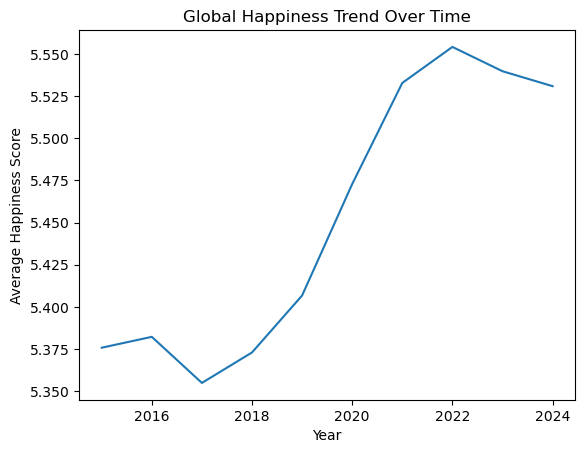

In [54]:
yearly_happiness = df.groupby("year")["happiness_score"].mean()

plt.plot(yearly_happiness.index, yearly_happiness.values)
plt.xlabel("Year")
plt.ylabel("Average Happiness Score")
plt.title("Global Happiness Trend Over Time")
plt.show()

Global happiness remains relatively stable, with minor fluctuations over time.


## Linear Regression
### Can GDP per Capita Predict Happiness Score?
We use a simple linear regression model to analyze whether GDP per capita can predict happiness.


In [55]:
X = df[["gdp_per_capita"]]
y = df["happiness_score"]

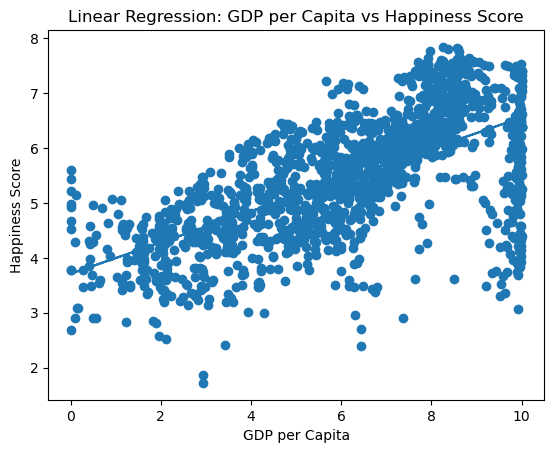

In [56]:
plt.scatter(X, y)
plt.plot(X, model.predict(X))

plt.xlabel("GDP per Capita")
plt.ylabel("Happiness Score")
plt.title("Linear Regression: GDP per Capita vs Happiness Score")
plt.show()

GDP per capita has a positive relationship with happiness, but it does not fully explain happiness on its own.

##  KMeans Clustering
### Grouping Countries by Well-Being Profile
We apply KMeans clustering to group countries based on key happiness indicators.


In [63]:
features = df[
    [
        "gdp_per_capita",
        "social_support",
        "healthy_life_expectancy",
        "freedom_to_make_life_choices"
    ]
]

In [64]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [66]:
df["cluster"].value_counts()

cluster
1    732
0    404
2    363
Name: count, dtype: int64

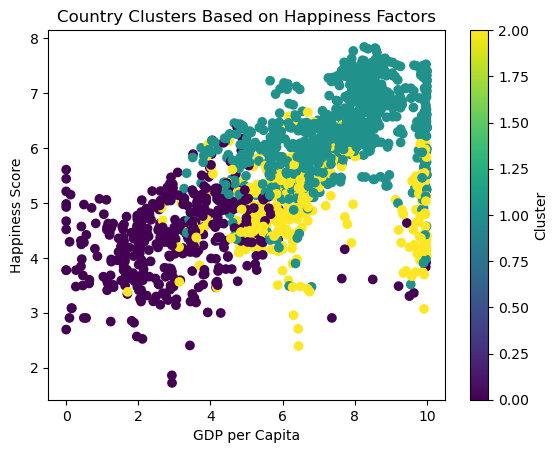

In [68]:
plt.scatter(
    df["gdp_per_capita"],
    df["happiness_score"],
    c=df["cluster"]
)
plt.xlabel("GDP per Capita")
plt.ylabel("Happiness Score")
plt.title("Country Clusters Based on Happiness Factors")
plt.colorbar(label="Cluster")
plt.show()


##  Final Conclusions
- Economic and social factors strongly influence happiness  
- Clear regional differences exist  
- Happiness cannot be explained by a single variable  
- Clustering reveals meaningful country groupings  
